In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration and analysis preparation

#### Reading the data and converting them into a Dataframe 

In [17]:
# Load all dataframes 

from data_loader import load_dataset as load_all

other_road_users, sensors = load_all()
print('Loaded', len(other_road_users), 'other dataframes and', len(sensors), 'sensors dataframes')
print('Sample other_road_users keys:', list(other_road_users.keys())[:10])
print('Sample sensors keys:', list(sensors.keys())[:10])

Loaded 12 other dataframes and 12 sensors dataframes
Sample other_road_users keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']
Sample sensors keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']


In [18]:
# Example access to a specific dataframe
other_road_users['ebike_subject_b'].head()

,frame_index,track_id,class_name,angle,distance,x,y,x_inter,y_inter,x_inter_rts,y_inter_rts,vx_rts,vy_rts,interpolated,corrected_class
0,1,2998,Pedestrian,42.328393,4.288271,2.9,3.2,2.9,3.2,2.8,3.2,0.3,-0.7,False,Pedestrian
1,2,2998,Pedestrian,42.710642,4.170300,2.8,3.1,2.8,3.1,2.8,3.2,0.3,-0.7,False,Pedestrian
2,3,2998,Pedestrian,42.957475,4.144064,2.8,3.0,2.8,3.0,2.8,3.2,0.3,-0.7,False,Pedestrian
3,4,2998,Pedestrian,43.143703,4.109669,2.8,3.0,2.8,3.0,2.9,3.1,0.4,-0.7,False,Pedestrian
4,5,2998,Pedestrian,43.419702,4.115735,2.8,3.0,2.8,3.0,2.9,3.1,0.4,-0.8,False,Pedestrian


In [22]:
sensors['escooter_subject_b'].head()

,timestamp,cts_gopro,date_gopro,GPS (Lat.) [deg],GPS (Long.) [deg],GPS (Alt.) [m],GPS (2D speed) [m/s],precision,cts_gyro,date_gyro,...,date_acc,Accelerometer (z) [m/s²],Accelerometer (x) [m/s²],Accelerometer (y) [m/s²],Accelerometer (x) Filtered [m/s²],Accelerometer (y) Filtered [m/s²],Accelerometer (z) Filtered [m/s²],Filtered velocity [m/s],bearing,frame_index
0,1759158087204000000,2113.222222,2025-09-29T15:01:29.304Z,45.779446,4.925584,175.468,0.273,120,45.271357,2025-09-29T15:01:27.203Z,...,2025-09-29T15:01:27.203Z,-9.767386,-0.491607,0.995204,0.158944,-0.595782,-10.008836,0.269621,264.528838,1
1,1759158087304000000,2224.444444,2025-09-29T15:01:29.414Z,45.779446,4.925583,175.494,0.119,120,147.131910,2025-09-29T15:01:27.304Z,...,2025-09-29T15:01:27.303Z,-9.858513,-0.988010,0.275779,0.140703,-0.196831,-9.917823,0.232444,288.396628,3
2,1759158087404000000,2335.666667,2025-09-29T15:01:29.524Z,45.779446,4.925583,175.513,0.064,120,247.734925,2025-09-29T15:01:27.403Z,...,2025-09-29T15:01:27.402Z,-9.913669,1.194245,-0.836930,0.155464,0.044691,-9.867709,0.197481,266.717303,6
3,1759158087504000000,2391.277778,2025-09-29T15:01:29.579Z,45.779446,4.925583,175.511,0.106,120,349.595477,2025-09-29T15:01:27.504Z,...,2025-09-29T15:01:27.502Z,-9.947242,-0.268585,1.251799,0.157911,0.173370,-9.847163,0.166549,212.717303,8
4,1759158087604000000,2502.500000,2025-09-29T15:01:29.689Z,45.779446,4.925583,175.531,0.042,120,450.198492,2025-09-29T15:01:27.604Z,...,2025-09-29T15:01:27.606Z,-9.659472,1.393285,-0.573141,0.102648,0.204963,-9.842394,0.140466,188.953945,11


In [ ]:
# Remove all the missing data in all the dataframes

for key in other_road_users:
    other_road_users[key] = other_road_users[key].dropna()
for key in sensors:
    sensors[key] = sensors[key].dropna()

In [27]:
# regroup the trials 
# each trial corresponds to a couple [ebike, escooter] 

# let's convert the date_gopro columns to datetime objects
for df in sensors.values():
    df['date_gopro'] = pd.to_datetime(df['date_gopro'])

# let's create a list of the first date_gopro for each dataframe sensors
trial_starts = []
for key, df in sensors.items():
    trial_starts.append((key, df['date_gopro'].min()))
trial_starts = sorted(trial_starts, key=lambda x: x[1])

trial_starts


[('ebike_subject_h', Timestamp('2025-09-29 13:59:27.223000+0000', tz='UTC')),
 ('escooter_subject_g',
  Timestamp('2025-09-29 13:59:43.350000+0000', tz='UTC')),
 ('escooter_subject_e',
  Timestamp('2025-09-29 14:16:24.465000+0000', tz='UTC')),
 ('ebike_subject_i', Timestamp('2025-09-29 14:16:32.392000+0000', tz='UTC')),
 ('ebike_subject_b', Timestamp('2025-09-29 14:29:18.593000+0000', tz='UTC')),
 ('escooter_subject_c',
  Timestamp('2025-09-29 14:29:29.199000+0000', tz='UTC')),
 ('ebike_subject_a', Timestamp('2025-09-29 14:44:08.255000+0000', tz='UTC')),
 ('escooter_subject_h',
  Timestamp('2025-09-29 14:47:11.470000+0000', tz='UTC')),
 ('escooter_subject_b',
  Timestamp('2025-09-29 15:01:29.304000+0000', tz='UTC')),
 ('ebike_subject_g', Timestamp('2025-09-29 15:01:40.516000+0000', tz='UTC')),
 ('escooter_subject_k',
  Timestamp('2025-09-29 15:19:04.362000+0000', tz='UTC')),
 ('ebike_subject_e', Timestamp('2025-09-29 15:21:59.206000+0000', tz='UTC'))]

In [28]:

# now we can regroup the trials 2 by 2 
trials = []
for i in range(0, len(trial_starts), 2):
    trial = (trial_starts[i][0], trial_starts[i+1][0])
    trials.append(trial)

trials

[('ebike_subject_h', 'escooter_subject_g'),
 ('escooter_subject_e', 'ebike_subject_i'),
 ('ebike_subject_b', 'escooter_subject_c'),
 ('ebike_subject_a', 'escooter_subject_h'),
 ('escooter_subject_b', 'ebike_subject_g'),
 ('escooter_subject_k', 'ebike_subject_e')]

## Description of the experimental condition 

### Question 3 : Provide a figure describing the experimental condition (initial position and path of each road user type).

Every Subject folder is a trial of an experiment, where we can observe the data of an ebike or an escooter. We have, for ebikes and escooters, 2 dataframes each times. Other_road_users describes interactions between the vehicle concerned and pedestrians. Sensors describes the physical datas of the vehicle. 

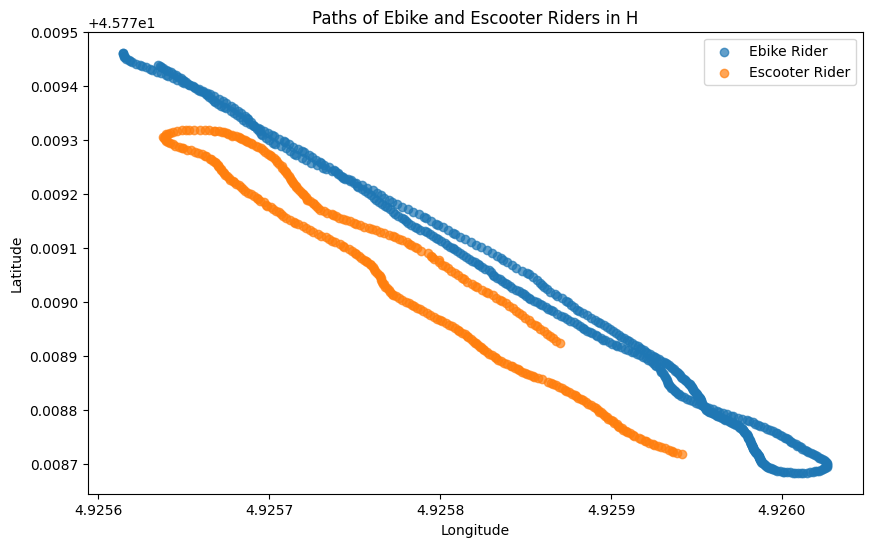

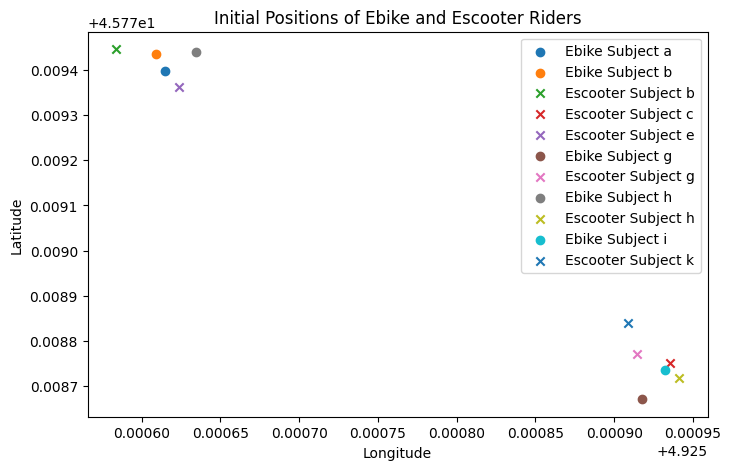

In [ ]:
#plot the path of ebike and escooter in subject b
plt.figure(figsize=(10, 6))
plt.scatter(sensors['ebike_subject_h']['GPS (Long.) [deg]'], sensors['ebike_subject_h']['GPS (Lat.) [deg]'], label='Ebike Rider', alpha=0.7)
plt.scatter(sensors['escooter_subject_h']['GPS (Long.) [deg]'], sensors['escooter_subject_h']['GPS (Lat.) [deg]'], label='Escooter Rider', alpha=0.7)
plt.title('Paths of Ebike and Escooter Riders in H') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#now plot only the initial position of the ebike and escooter riders (first data point) in all the subjects (a, b, c, e, g, h, i, k)
plt.figure(figsize=(8, 5))
# if there is no data for a ebike or escooter in a subject, skip it
subjects = ['a', 'b', 'c', 'e', 'g', 'h', 'i', 'k']
for subject in subjects:
    ebike_key = f'ebike_subject_{subject}'
    escooter_key = f'escooter_subject_{subject}'
    if ebike_key in sensors and not sensors[ebike_key].empty:
        plt.scatter(sensors[ebike_key]['GPS (Long.) [deg]'].iloc[0], sensors[ebike_key]['GPS (Lat.) [deg]'].iloc[0], label=f'Ebike Subject {subject}', marker='o')
    if escooter_key in sensors and not sensors[escooter_key].empty:
        plt.scatter(sensors[escooter_key]['GPS (Long.) [deg]'].iloc[0], sensors[escooter_key]['GPS (Lat.) [deg]'].iloc[0], label=f'Escooter Subject {subject}', marker='x')
plt.title('Initial Positions of Ebike and Escooter Riders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()